# 9. Watershed algorithm

In a number of cases, one is able to detect the positions of multiple objects on an image, but it might be difficult to segment them because they are close together or very irregular. This is where the wahtersehd algorithm is very practical. It takes as input an image, and a series of seeds and expands each region centered around a seed as if it was filling a topographic map.

In [1]:
from skimage.morphology import watershed

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.external.tifffile import TiffFile
import skimage.io as io
from skimage.morphology import label

import course_functions
datapath = course_functions.define_data_path()

In [4]:
#load the image to process
image = io.imread(datapath+'Data/A9/A9 p9d.tif')


## 9.1 Create seeds 

We can use the code of the last chapter to produce the seeds. We added the necessary code in our course module called course_functions

In [5]:
#generate template
template = course_functions.create_disk_template(10)
#generate seed map
seed_map, global_mask = course_functions.detect_nuclei_template(image, template)

We need to create a labeled image, so that the watershed algorithm creates regions with different labels:

In [6]:
seed_label = label(seed_map)

Now we can use the image and the labeled seed map to run the watershed algorithm. However, remember the analogy of filling a topographic map: our nuclei should be "deep" regions, so we need to invert the image. Finally we also require that a thin line separates regions (watershed_line option).

In [7]:
watershed_labels = watershed(image = -image, markers = seed_label, watershed_line=True)

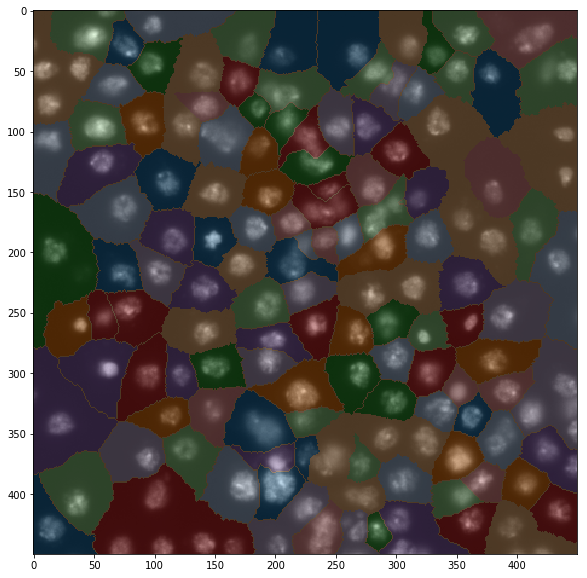

In [8]:
#create a random map 
plt.figure(figsize = (10,10))

cmap = plt.cm.colors.ListedColormap(plt.cm.tab20(np.random.randint(10,size=256)))

plt.imshow(image, cmap = 'gray')
plt.imshow(watershed_labels, cmap = cmap, alpha = 0.3)
plt.show()

The algorithm worked well and created regions around each nucleus. However we are only interested in the actual nuclei properties. So let's use our global masks to limit ourselves to those regions:

In [9]:
watershed_labels = watershed(image = -image, markers = seed_label, mask = global_mask, watershed_line=True)

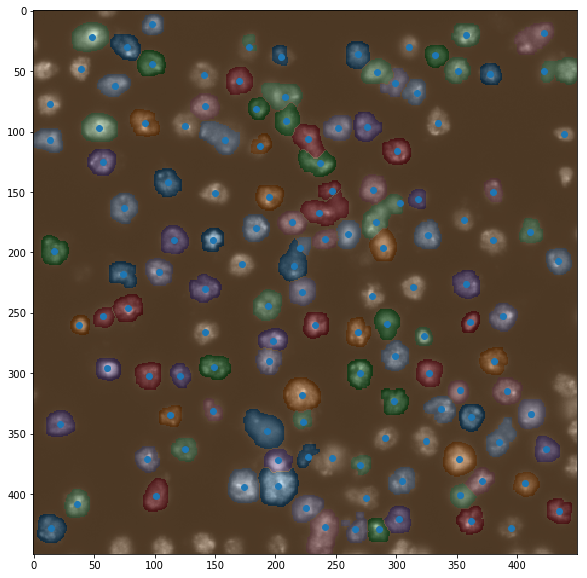

In [10]:
plt.figure(figsize = (10,10))
plt.imshow(image, cmap = 'gray')
plt.imshow(watershed_labels, cmap = cmap, alpha = 0.3)
plt.plot(np.argwhere(seed_map)[:,1],np.argwhere(seed_map)[:,0],'o')
plt.show()